# Integrals

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

---

# 0. Basics

### Example

Let's say you have a car, and it's going 25 miles per hour, how would you use that to figure out how far the car had traveled? We can start by noting that the rate of change of our car's position, or _velocity_ (equivalent to _speed_, but with a sign or direction), can be represented by a simple, _constant_, function:

$v(t) = 25$

From this, then, we have the _slope_ of the car's position function, so we can say: what function would have this slope?

We've discussed previously what kind of function a constant number must be a derivative for.

Then, by power rule, we should also assume a possible constant term.

$p(t) = 25 * t + p_{0}$

This process, of starting with a _derivative_ and working up towards the original function, is known as _integration_

---

# 1. More Formally

So, we've worked through a somewhat intuitive process, based on applying what seem to be the relevant rules for derivation, but working backwards while we did that. How can we solve for an integral without knowing the right anti-derivation rule(s) to apply?

$a(t) = 25$

$v(t) = 25 * t + v_0$

$p(t) = \large \frac{25}{2} \small * t^2 + v_0 * t + p_0$

In [1]:
a = lambda t: 25

In [4]:
def v(t, v0=0):
    return 25 * t + v0

In [5]:
def p(t, v0=0, p0=0):
    return (25 / 2) * t ** 2 + v0 * t + p0

In [12]:
positions = pd.Series([p(t) for t in range(10)], name="position")

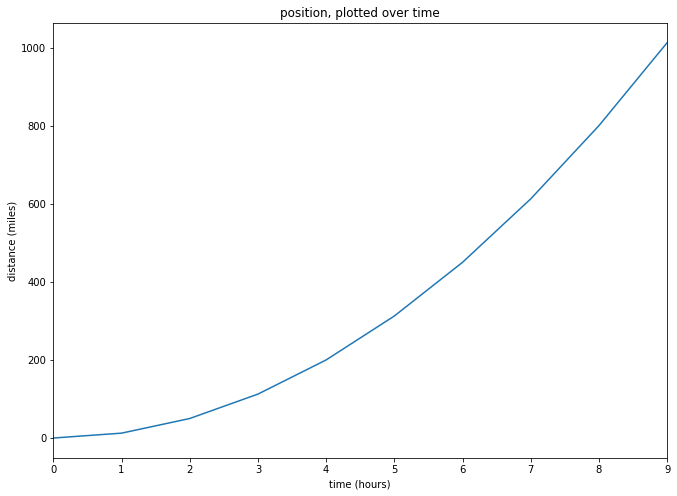

In [15]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

- ok, want to show that sum under a certain part of velocity curve = position, and ditto for acceleration and velocity, respectively. 

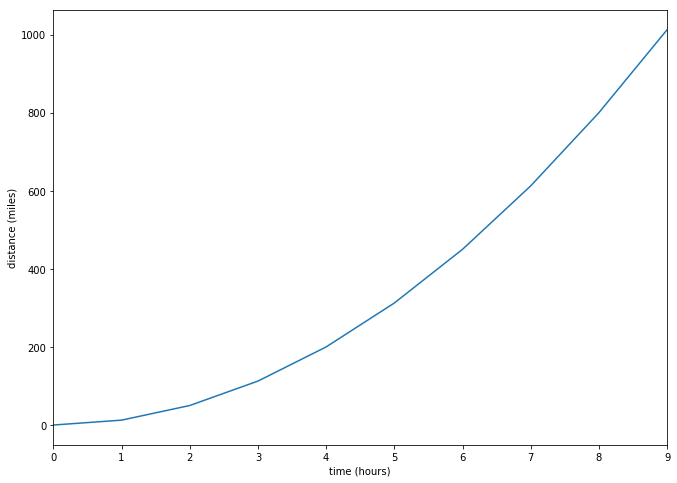

In [14]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")